In [2]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [4]:
df = pd.read_csv('dietary_patterns_cancer.csv')

In [6]:
df.head()

,Fruits and vegetables,Whole grains,Legumes,Nuts and seeds,Fish and poultry,Processed meats,Red meat,Refined grains,Sugary drinks,High-fat dairy,Smoking,Prostate cancer
0,1,1,2,2,1,4,5,4,4,5,4,yes
1,1,2,2,2,1,5,5,4,5,5,4,yes
2,5,2,2,1,2,4,1,5,4,3,5,no
3,4,3,1,3,1,2,3,4,1,1,1,no
4,2,1,2,2,2,5,5,4,4,5,3,yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Fruits and vegetables  2096 non-null   int64 
 1   Whole grains           2096 non-null   int64 
 2   Legumes                2096 non-null   int64 
 3   Nuts and seeds         2096 non-null   int64 
 4   Fish and poultry       2096 non-null   int64 
 5   Processed meats        2096 non-null   int64 
 6   Red meat               2096 non-null   int64 
 7   Refined grains         2096 non-null   int64 
 8   Sugary drinks          2096 non-null   int64 
 9   High-fat dairy         2096 non-null   int64 
 10  Smoking                2096 non-null   int64 
 11  Prostate cancer        2096 non-null   object
dtypes: int64(11), object(1)
memory usage: 196.6+ KB


In [10]:
df.shape

(2096, 12)

In [12]:
#Drop rows containing null values 

In [14]:
df = df.dropna(axis=0).reset_index(drop = True)

In [16]:
df.isna().sum().sort_values(ascending=False)

Fruits and vegetables    0
Whole grains             0
Legumes                  0
Nuts and seeds           0
Fish and poultry         0
Processed meats          0
Red meat                 0
Refined grains           0
Sugary drinks            0
High-fat dairy           0
Smoking                  0
Prostate cancer          0
dtype: int64

In [18]:
X = df.drop(['Prostate cancer'], axis=1)

y = df['Prostate cancer']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
X_train.shape, X_test.shape

((1467, 11), (629, 11))

In [24]:
#Feature Engineering

In [26]:
X_train.dtypes

Fruits and vegetables    int64
Whole grains             int64
Legumes                  int64
Nuts and seeds           int64
Fish and poultry         int64
Processed meats          int64
Red meat                 int64
Refined grains           int64
Sugary drinks            int64
High-fat dairy           int64
Smoking                  int64
dtype: object

In [28]:
X_train.head()

,Fruits and vegetables,Whole grains,Legumes,Nuts and seeds,Fish and poultry,Processed meats,Red meat,Refined grains,Sugary drinks,High-fat dairy,Smoking
939,4,5,1,4,2,4,2,4,3,2,3
199,3,3,5,3,3,5,3,1,1,1,5
1299,1,1,1,1,1,4,5,5,4,5,5
1301,5,3,1,3,1,2,4,4,5,1,2
1221,2,4,3,4,3,5,4,3,4,1,4


In [30]:
X_test.head()

,Fruits and vegetables,Whole grains,Legumes,Nuts and seeds,Fish and poultry,Processed meats,Red meat,Refined grains,Sugary drinks,High-fat dairy,Smoking
29,2,3,4,3,2,3,3,3,2,3,3
845,1,1,2,1,1,4,5,5,4,4,1
812,3,5,3,2,2,3,2,5,4,4,1
432,2,2,1,1,2,4,4,4,5,4,5
1383,1,5,3,3,1,1,2,5,1,2,2


In [32]:
clf = LogisticRegression(solver='liblinear', max_iter=200).fit(X_train, y_train)

In [34]:
clf.coef_

array([[-1.73734663, -1.34639135, -0.91417523, -2.02870748, -1.19218975,
         0.89246533,  0.51173985,  0.68386801,  0.95546506,  1.02266823,
        -0.11307739]])

In [36]:
clf.intercept_

array([-1.60650377])

In [38]:
#Evaluating the model

In [40]:
y_pred = clf.predict(X_test)

In [42]:
from sklearn import metrics

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.990461
Precision: 0.990066
Recall: 0.990991
F1 Score: 0.990438


In [44]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


scores = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

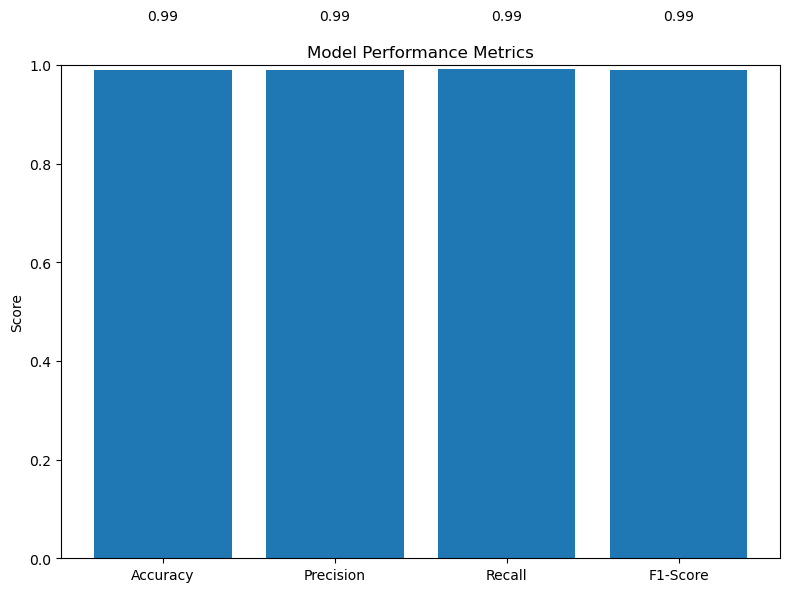

In [46]:
#showing the result of precision_score, recall_score, f1_score, accuracy_score in Bar Chart Form
plt.figure(figsize=(8, 6))
plt.bar(scores.keys(), scores.values())
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Assuming all scores are between 0 and 1

for i, v in enumerate(scores.values()):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()